<a href="https://colab.research.google.com/github/Chaitanyajasuja03/deep-learning-models/blob/main/Greedy_Layerwise_training_of_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test = X_train.reshape((-1, 28, 28, 1)), X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding for classification
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define Autoencoder
input_layer = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Pretrain Autoencoder (Unsupervised)
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True)

# Extract Encoder for Greedy Pretraining
encoder = models.Model(input_layer, encoded)

# Fine-Tuning (Supervised Learning)
encoded_input = layers.Input(shape=(14, 14, 64))
x = layers.Flatten()(encoded_input)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

classifier = models.Model(encoded_input, x)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Classifier with Encoded Features
classifier.fit(encoder.predict(X_train), y_train, epochs=5, batch_size=256, validation_data=(encoder.predict(X_test), y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1966
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0655
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0639
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0632
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0629
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0624
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0623
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0621
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0620
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0618
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7763 - loss: 0.7560 - val_accuracy: 0.9307 - val_loss: 0.2271
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc

In [2]:
loss, accuracy = classifier.evaluate(encoder.predict(X_test), y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1098
Test Accuracy: 96.89%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


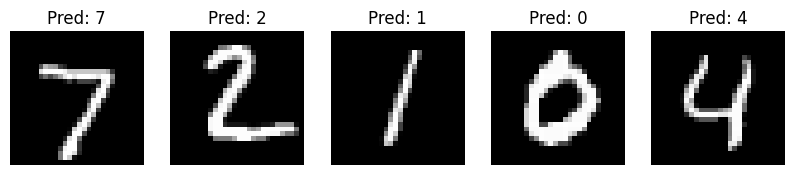

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Select some test images
n = 5
test_imgs = X_test[:n]
encoded_test_imgs = encoder.predict(test_imgs)

# Get classifier predictions
predictions = np.argmax(classifier.predict(encoded_test_imgs), axis=1)

# Plot results
plt.figure(figsize=(10, 2))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(test_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {predictions[i]}")
plt.show()